# 0. GOAL

희준은 부쩍 헬스에 관심이 많이 생겼다고 합니다. 주변 헬스인들에게 이 사실을 알리니, 프로틴 보충제 사이트를 추천해주더군요.

며칠 전 텍스트 전처리를 배운 희준은 해당 사이트에서 보충제 리뷰를 크롤링해와 워드클라우드를 그려보기로 결심합니다.

파이프라인은 다음과 같습니다.

정규표현식으로 한글만 추린다
띄어쓰기를 교정한다(PyKospacing)
형태소로 토큰화한다(okt)
불용어를 제거한다
원하는 단어를 Konlpy 사전에 추가한다
워드클라우드를 그린다

# 1. Import, Load Data

In [10]:
!pip install konlpy
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 31.1 MB/s eta 0:00:00
  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-ktgtzpvw
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-ktgtzpvw
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit 04aeebcbe26b109486a642e57dc58665c4818cf3
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 30.8 MB/s et

In [1]:
import pandas as pd
import numpy as np
import re
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/MyDrive/KUBIG24_1/NLP/'

In [4]:
df = pd.read_csv(data_path + 'protein.csv')
df = pd.read_csv("https://raw.githubusercontent.com/KU-BIG/KUBIG_2024_SPRING/main/BASIC%20STUDY/NLP/WEEK1/protein.csv")

In [5]:
df.head()

,Unnamed: 0,title,content,text
0,0,처음 사먹어 보는데 맛있네요,맛이 좋아서 꾸준히 먹고 있습니다.^^,처음 사먹어 보는데 맛있네요맛이 좋아서 꾸준히 먹고 있습니다.^^
1,1,말해 뭐합니까 ㅋㅋㅋ 역시,가성비 갑 제품 + 맛도 다양해서 ㅋㅋㅋ 항상 구매하고 있습니다요! \n\n ...,말해 뭐합니까 ㅋㅋㅋ 역시가성비 갑 제품 + 맛도 다양해서 ㅋㅋㅋ 항상 구매하고 있...
2,2,좋넹요,맛있습니다. 저번에 말차라떼도 먹어봤는데 그것보다 더 나은거 같네요,좋넹요맛있습니다. 저번에 말차라떼도 먹어봤는데 그것보다 더 나은거 같네요
3,3,매우 만족합니다,5키로는 정말 엄청크네요.\n 평점이 좋아서 스트로베리크림으로 주문했는데 좋습...,매우 만족합니다5키로는 정말 엄청크네요.\n 평점이 좋아서 스트로베리크림으로 ...
4,4,마싯어요,약간 달긴 하지만 물에 잘 녹고 가루날림이 거의없어 좋아요,마싯어요약간 달긴 하지만 물에 잘 녹고 가루날림이 거의없어 좋아요


# 2. 정규표현식으로 한글 단어만 남기기

이제 정규표현식으로 한글 단어만 남기고 모두 제외

In [6]:
def extract_hangul(text):
  hangul = re.sub('[^가-힣]', ' ', text)
  #text에 할당된 텍스트 데이터중 한글 제외한 나머지를 공백으로 대체
  return hangul

In [7]:
example = extract_hangul(df['text'][1])
print("전처리 이전: ", df['text'][1])
print("전처리 이후: ", example)

전처리 이전:  말해 뭐합니까 ㅋㅋㅋ 역시가성비 갑 제품 + 맛도 다양해서 ㅋㅋㅋ 항상 구매하고 있습니다요! 

    스트로베리 크림치즈가 가장 맛있었네요!
전처리 이후:  말해 뭐합니까     역시가성비 갑 제품   맛도 다양해서     항상 구매하고 있습니다요        스트로베리 크림치즈가 가장 맛있었네요 


# 3. 띄어쓰기 교정 (PyKoSpacing)

PyKoSpacing은 띄어쓰기가 되지 않은 문장을 띄어쓰기가 된 문장으로 교정해주는 패키지입니다다. 앞서 한글 외 다른 문자를 공백으로 치환했는데, 중첩된 공백들도 이 띄어쓰기 교정으로 하나의 공백으로 바꿔줄 수 있습니다.

In [11]:
from pykospacing import Spacing
spacing = Spacing()

In [12]:
def spacing_text(text):
  spaced_text = spacing(text)
  return spaced_text

In [13]:
spaced = spacing_text(example)
print("전처리 이전: ",example)
print("전처리 이후: ",spaced)

전처리 이전:  말해 뭐합니까     역시가성비 갑 제품   맛도 다양해서     항상 구매하고 있습니다요        스트로베리 크림치즈가 가장 맛있었네요 
전처리 이후:  말해 뭐 합니까 역시 가성비 갑 제품 맛도 다양해서 항상 구매하고 있습니다 요 스트로베리 크림치즈가 가장 맛있었네요


# 4. 형태소 분석기 (okt)

한국어에서 토큰화를 해주는 대표적인 도구는 konlpy입니다. 가장 대표적인 형태소 분석기는 Okt 모델입니다.

In [14]:
from konlpy.tag import Okt
okt = Okt()

In [15]:
def extract_morphs(text):
  morphs_ = okt.morphs(text, stem=True)
  return morphs_

In [16]:
morphs_ = extract_morphs(spaced)
print("전처리 이전: ",spaced)
print("전처리 이후: ",morphs_)

전처리 이전:  말해 뭐 합니까 역시 가성비 갑 제품 맛도 다양해서 항상 구매하고 있습니다 요 스트로베리 크림치즈가 가장 맛있었네요
전처리 이후:  ['말', '하다', '뭐', '합', '니까', '역시', '가성', '비', '갑', '제품', '맛', '도', '다양하다', '항상', '구매', '하고', '있다', '요', '스트로베리', '크림', '치즈', '가', '가장', '맛있다']


# 5. 불용어 제거

분석에 있어 큰 의미가 없는 '불용어(stopword)'를 지정해줘야 합니다. '하다', '도', '는', '이다' 등 의미가 없는 어미나 조사같은 것을 지워주기로 합니다.

이번에는 수업에서 올려주신 불용어 리스트와, 제가 예전에 제작한 리스트 두 가지를 각각 적용 해보겠습니다.

In [17]:
# 5.1. KUBIG's Stopword List

with open(data_path + 'stopword.txt') as f:
    list_file = f.readlines()

stopwords_list = []
for stopword in list_file:
  stopwords = re.sub('[\n]', '', stopword)
  stopwords_list.append(stopwords)

def remove_stopwords(text):
  remove_stop = [x for x in text if x not in stopwords_list]
  return remove_stop

In [18]:
remove_stop1 = remove_stopwords(morphs_)
print("전처리 이전: ",morphs_)
print("전처리 이후: ",remove_stop1)

전처리 이전:  ['말', '하다', '뭐', '합', '니까', '역시', '가성', '비', '갑', '제품', '맛', '도', '다양하다', '항상', '구매', '하고', '있다', '요', '스트로베리', '크림', '치즈', '가', '가장', '맛있다']
전처리 이후:  ['말', '뭐', '합', '니까', '역시', '가성', '비', '갑', '제품', '맛', '도', '다양하다', '항상', '구매', '하고', '요', '스트로베리', '크림', '치즈', '가장', '맛있다']


In [19]:
# 5.2, My Stopword List

with open(data_path + '한국어불용어600.txt') as f:
    list_file = f.readlines()

stopwords_list = []
for stopword in list_file:
  stopwords = re.sub('[\n]', '', stopword)
  stopwords_list.append(stopwords)

def remove_stopwords(text):
  remove_stop = [x for x in text if x not in stopwords_list]
  return remove_stop

In [20]:
remove_stop2 = remove_stopwords(morphs_)
print("전처리 이전: ",morphs_)
print("전처리 이후: ",remove_stop2)

전처리 이전:  ['말', '하다', '뭐', '합', '니까', '역시', '가성', '비', '갑', '제품', '맛', '도', '다양하다', '항상', '구매', '하고', '있다', '요', '스트로베리', '크림', '치즈', '가', '가장', '맛있다']
전처리 이후:  ['말', '뭐', '합', '니까', '역시', '가성', '비', '갑', '제품', '맛', '도', '다양하다', '항상', '구매', '하고', '요', '스트로베리', '크림', '치즈', '가장', '맛있다']


비슷한 결과가 나옵니다 ㅎㅎㅎ

## 5.3. 핵심 단어를 제외한 한 글자 단어들도 제거

In [21]:
def remove_one(text):
  except_list = ['맛','향','짱']
  remove_one_ = [x for x in text if len(x)>1 or x in except_list]
  return remove_one_

In [22]:
remove_one_ = remove_one(remove_stop2)
print("전처리 이전: ",remove_stop2)
print("전처리 이후: ",remove_one_)

전처리 이전:  ['말', '뭐', '합', '니까', '역시', '가성', '비', '갑', '제품', '맛', '도', '다양하다', '항상', '구매', '하고', '요', '스트로베리', '크림', '치즈', '가장', '맛있다']
전처리 이후:  ['니까', '역시', '가성', '제품', '맛', '다양하다', '항상', '구매', '하고', '스트로베리', '크림', '치즈', '가장', '맛있다']


**Q) 왜 저는 '향', '짱'등의 주요 단어가 이미 제거되었는지....?**

그런데 몇 단어들을 찾아보니 가성비는 가, 성비가 나뉘고 프로틴은 프로, 틴이 나뉘는 안타까운 상황이 발생했습니다.

이런 경우, konlpy 사전에 직접 단어를 등재시키는 방법이 있습니다.

아래처럼 os 모듈을 사용하여 코랩 패키지에 저장된 konlpy 폴더에 손을 대는 방식입니다.

우선 chdir로 경로를 이동해주고 makedirs로 임시폴더를 만들어준 후. 이 임시폴더에서 단어 사전을 수정한 뒤 원본 폴더에 저장해줍니다.

In [24]:
import os

os.chdir('/usr/local/lib/python3.10/dist-packages/konlpy/java')
os.getcwd()
os.makedirs('./aaaa')

In [25]:
os.chdir('/usr/local/lib/python3.10/dist-packages/konlpy/java/aaaa') #임시 폴더로 이동
os.getcwd()

'/usr/local/lib/python3.10/dist-packages/konlpy/java/aaaa'

In [26]:
!jar xvf ../open-korean-text-2.1.0.jar

  created: META-INF/
 inflated: META-INF/MANIFEST.MF
  created: org/
  created: org/openkoreantext/
  created: org/openkoreantext/processor/
  created: org/openkoreantext/processor/normalizer/
  created: org/openkoreantext/processor/phrase_extractor/
  created: org/openkoreantext/processor/qa/
  created: org/openkoreantext/processor/stemmer/
  created: org/openkoreantext/processor/tokenizer/
  created: org/openkoreantext/processor/tools/
  created: org/openkoreantext/processor/util/
  created: org/openkoreantext/processor/util/adjective/
  created: org/openkoreantext/processor/util/adverb/
  created: org/openkoreantext/processor/util/auxiliary/
  created: org/openkoreantext/processor/util/freq/
  created: org/openkoreantext/processor/util/josa/
  created: org/openkoreantext/processor/util/noun/
  created: org/openkoreantext/processor/util/substantives/
  created: org/openkoreantext/processor/util/typos/
  created: org/openkoreantext/processor/util/verb/
 inflated: org/openkoreantext/pr

In [27]:
with open(f"/usr/local/lib/python3.10/dist-packages/konlpy/java/aaaa/org/openkoreantext/processor/util/noun/names.txt") as f:
    data = f.read()

In [28]:
data

'가몽\n가온\n갓세븐\n강새이\n게임닉가\n관우\n귀여미\n규\n김유이\n김준면\n까까런\n노컷\n누너예\n니노\n다마고치\n다이무스\n대학생\n데이브\n도요토미\n동운\n동이\n두주니\n디시인사이드\n디오\n라몹\n라스\n라옵\n멍구\n메이든\n명덕\n명량\n문민정부\n미네\n방엘리\n병헌\n붓다\n비정상회담\n빼빼로\n삼풍\n샤인온미\n성식\n성열\n세라문\n세라복\n세종대왕\n손권\n손책\n쇼미더머니\n쇼챔\n순규\n스라소니\n신동아\n신쓰패밀리\n신아라\n아베\n안상홍\n안홍준\n여누\n여랑\n여포\n연합\n오꾸닭\n요섭\n웃찾사\n원식\n유병언\n유비\n유이\n윤기형\n이나단\n이명박\n이완용\n임창용\n자괴\n자니윤\n자대련\n자유\n재중이\n전교조\n정윤회\n제갈량\n조자룡\n조조\n준면\n지오디\n지존파\n진영오\n차작가\n차트\n창섭\n챠트\n첸\n코르사주\n하무열\n하용파쿠\n혁재\n현이\n현태\n혜미\n'

단어 추가

In [35]:
data += '프로틴\n가성비\n밀크티\n'

with open("/usr/local/lib/python3.10/dist-packages/konlpy/java/aaaa/org/openkoreantext/processor/util/noun/names.txt", 'w') as f:
    f.write(data)

**여기까지 하고 재실행, 재실행 시에는 단어 추가단계 스킵**

In [36]:
data

'가몽\n가온\n갓세븐\n강새이\n게임닉가\n관우\n귀여미\n규\n김유이\n김준면\n까까런\n노컷\n누너예\n니노\n다마고치\n다이무스\n대학생\n데이브\n도요토미\n동운\n동이\n두주니\n디시인사이드\n디오\n라몹\n라스\n라옵\n멍구\n메이든\n명덕\n명량\n문민정부\n미네\n방엘리\n병헌\n붓다\n비정상회담\n빼빼로\n삼풍\n샤인온미\n성식\n성열\n세라문\n세라복\n세종대왕\n손권\n손책\n쇼미더머니\n쇼챔\n순규\n스라소니\n신동아\n신쓰패밀리\n신아라\n아베\n안상홍\n안홍준\n여누\n여랑\n여포\n연합\n오꾸닭\n요섭\n웃찾사\n원식\n유병언\n유비\n유이\n윤기형\n이나단\n이명박\n이완용\n임창용\n자괴\n자니윤\n자대련\n자유\n재중이\n전교조\n정윤회\n제갈량\n조자룡\n조조\n준면\n지오디\n지존파\n진영오\n차작가\n차트\n창섭\n챠트\n첸\n코르사주\n하무열\n하용파쿠\n혁재\n현이\n현태\n혜미\n프로틴\n가성비\n밀크티\n프로틴\n가성비\n밀크티\n'

In [31]:
!jar cvf ../open-korean-text-2.1.0.jar *

added manifest
ignoring entry META-INF/
adding: META-INF/maven/(in = 0) (out= 0)(stored 0%)
adding: META-INF/maven/org.openkoreantext/(in = 0) (out= 0)(stored 0%)
adding: META-INF/maven/org.openkoreantext/open-korean-text/(in = 0) (out= 0)(stored 0%)
adding: META-INF/maven/org.openkoreantext/open-korean-text/pom.xml(in = 9127) (out= 2208)(deflated 75%)
adding: META-INF/maven/org.openkoreantext/open-korean-text/pom.properties(in = 119) (out= 110)(deflated 7%)
ignoring entry META-INF/MANIFEST.MF
adding: org/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/processor/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/processor/util/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/processor/util/CharArrayMap$EntrySet.class(in = 2788) (out= 1181)(deflated 57%)
adding: org/openkoreantext/processor/util/CharArrayMap$1.class(in = 1531) (out= 571)(deflated 62%)
adding: org/openkoreantext/processor/util/example_tweets.txt(

In [37]:
print(okt.nouns("가성비"))
print(okt.nouns("프로틴"))

['가성', '비']
['프로', '틴']


런타임을 재시작했는데 안됐습니다. 어디서 부터 다시 실행해야하는게 맞을까요..

In [42]:
except_list = ['맛','향','짱']

with open(data_path + 'stopword.txt') as f:
    list_file = f.readlines()

stopwords_list = []
for stopword in list_file:
  stopwords = re.sub('[\n]', '', stopword)
  stopwords_list.append(stopwords)

def review_to_words(raw_review):
  text = re.sub('[^가-힣]', ' ', raw_review)
  text = spacing(text)
  text = okt.morphs(text, stem=True)
  text = [x for x in text if x not in stopwords_list]
  text = [x for x in text if len(x)>1 or x in except_list]
  text = " ".join(text)
  return text

In [43]:
import tqdm
df_len = df.shape[0]
words_list = []
for i in range(df_len):
  words_list.append(review_to_words(df['text'][i]))

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline
def displayWordCloud(data = None, backgroundcolor = 'white', width=None, height=None):
    wordcloud = WordCloud(font_path = data_path + 'SeoulNamsanL.ttf',
                          background_color = backgroundcolor,
                          width = width,
                          height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

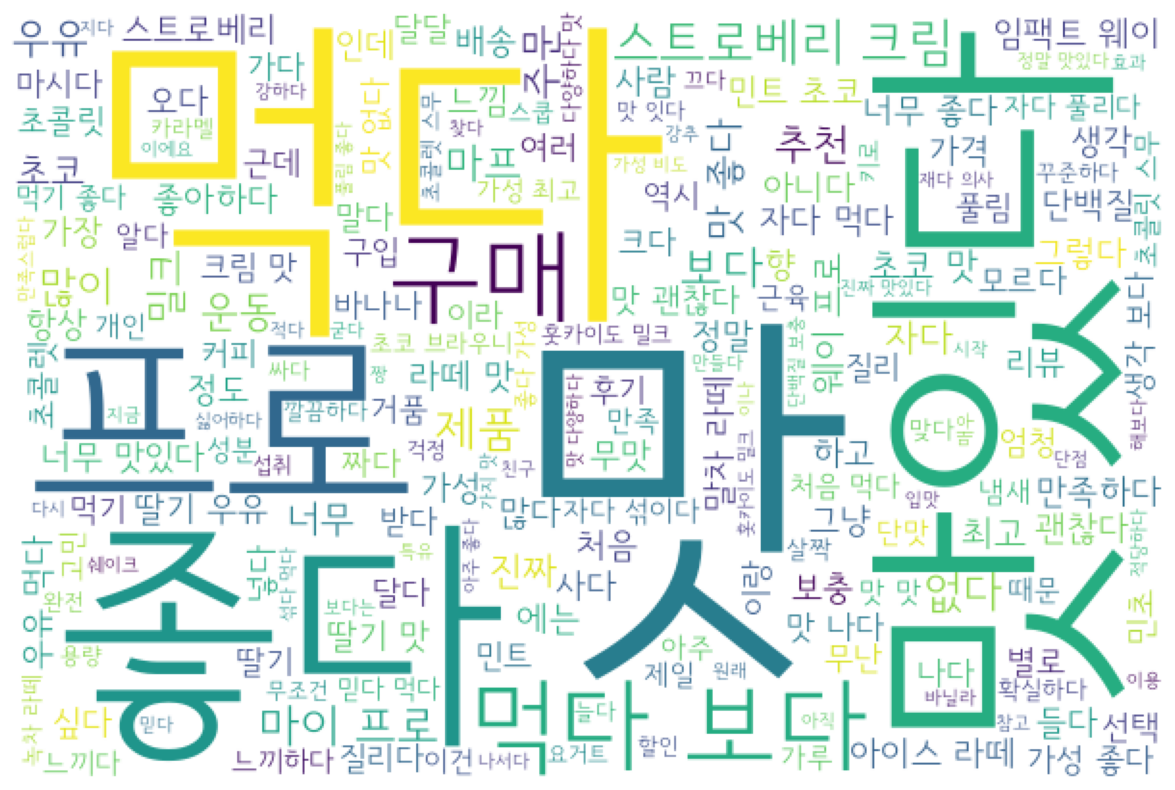

In [52]:
displayWordCloud(data = ' '.join(words_list), width=600, height=400)